In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from superpoint.settings import EXPER_PATH
import superpoint.evaluations.detector_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def draw_keypoints(img, corners, color, radius=3, s=3):
    img = np.repeat(cv2.resize(img, None, fx=s, fy=s)[..., np.newaxis], 3, -1)
    for c in np.stack(corners).T:
        cv2.circle(img, tuple(s*np.flip(c, 0)), radius, color, thickness=-1)
    return img
def select_top_k(prob, thresh=0, num=300):    
    pts = np.where(prob > thresh)
    idx = np.argsort(prob[pts])[::-1][:num]
    pts = (pts[0][idx], pts[1][idx])
    return pts

# HPatches Viewpoint

In [3]:
experiments = [
    'mp_synth-v11_repeat_hp_v',
    'magic-point_hpatches-repeatability-v'
]
confidence_thresholds = [0.001, 0.001, 0.001, 0.001, 0.001, 0, 0, 0]

### Images visualization

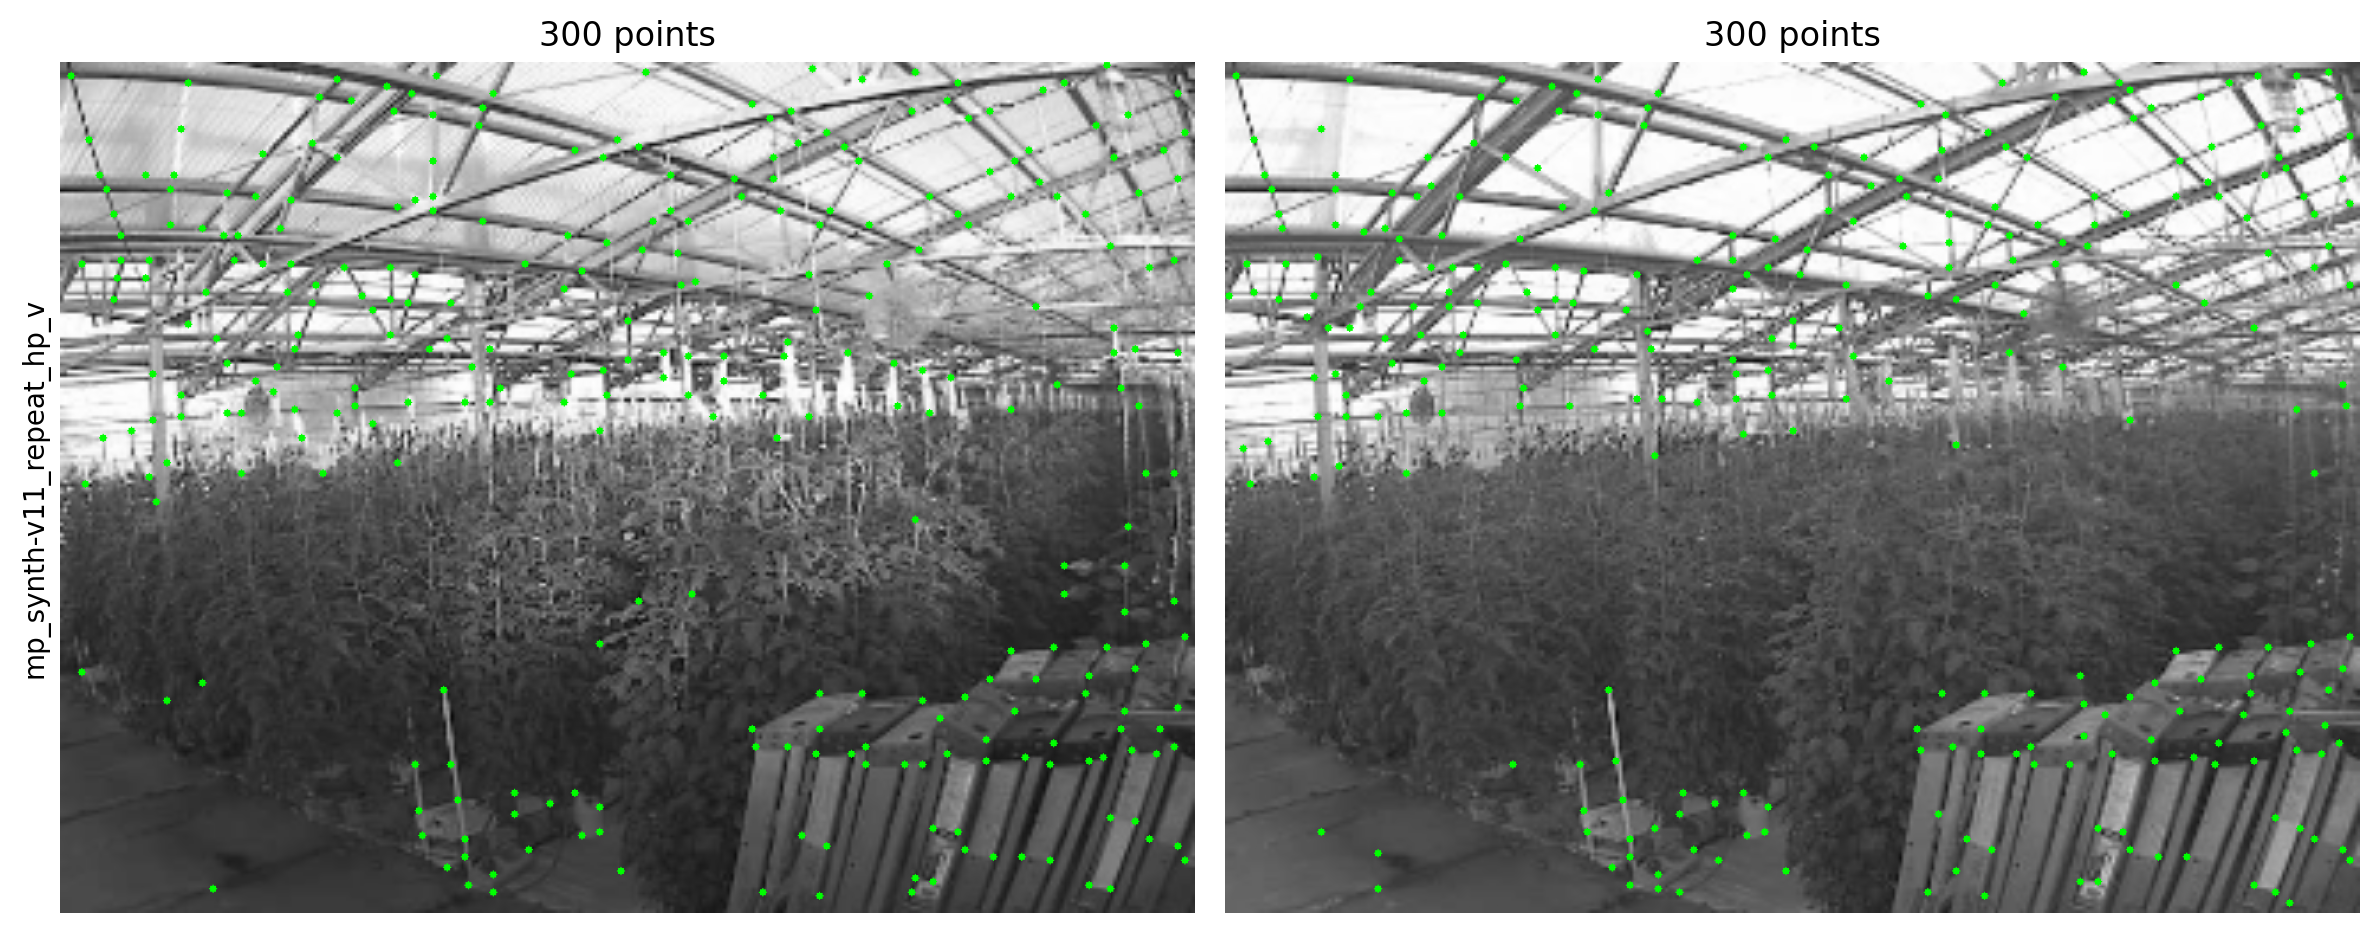

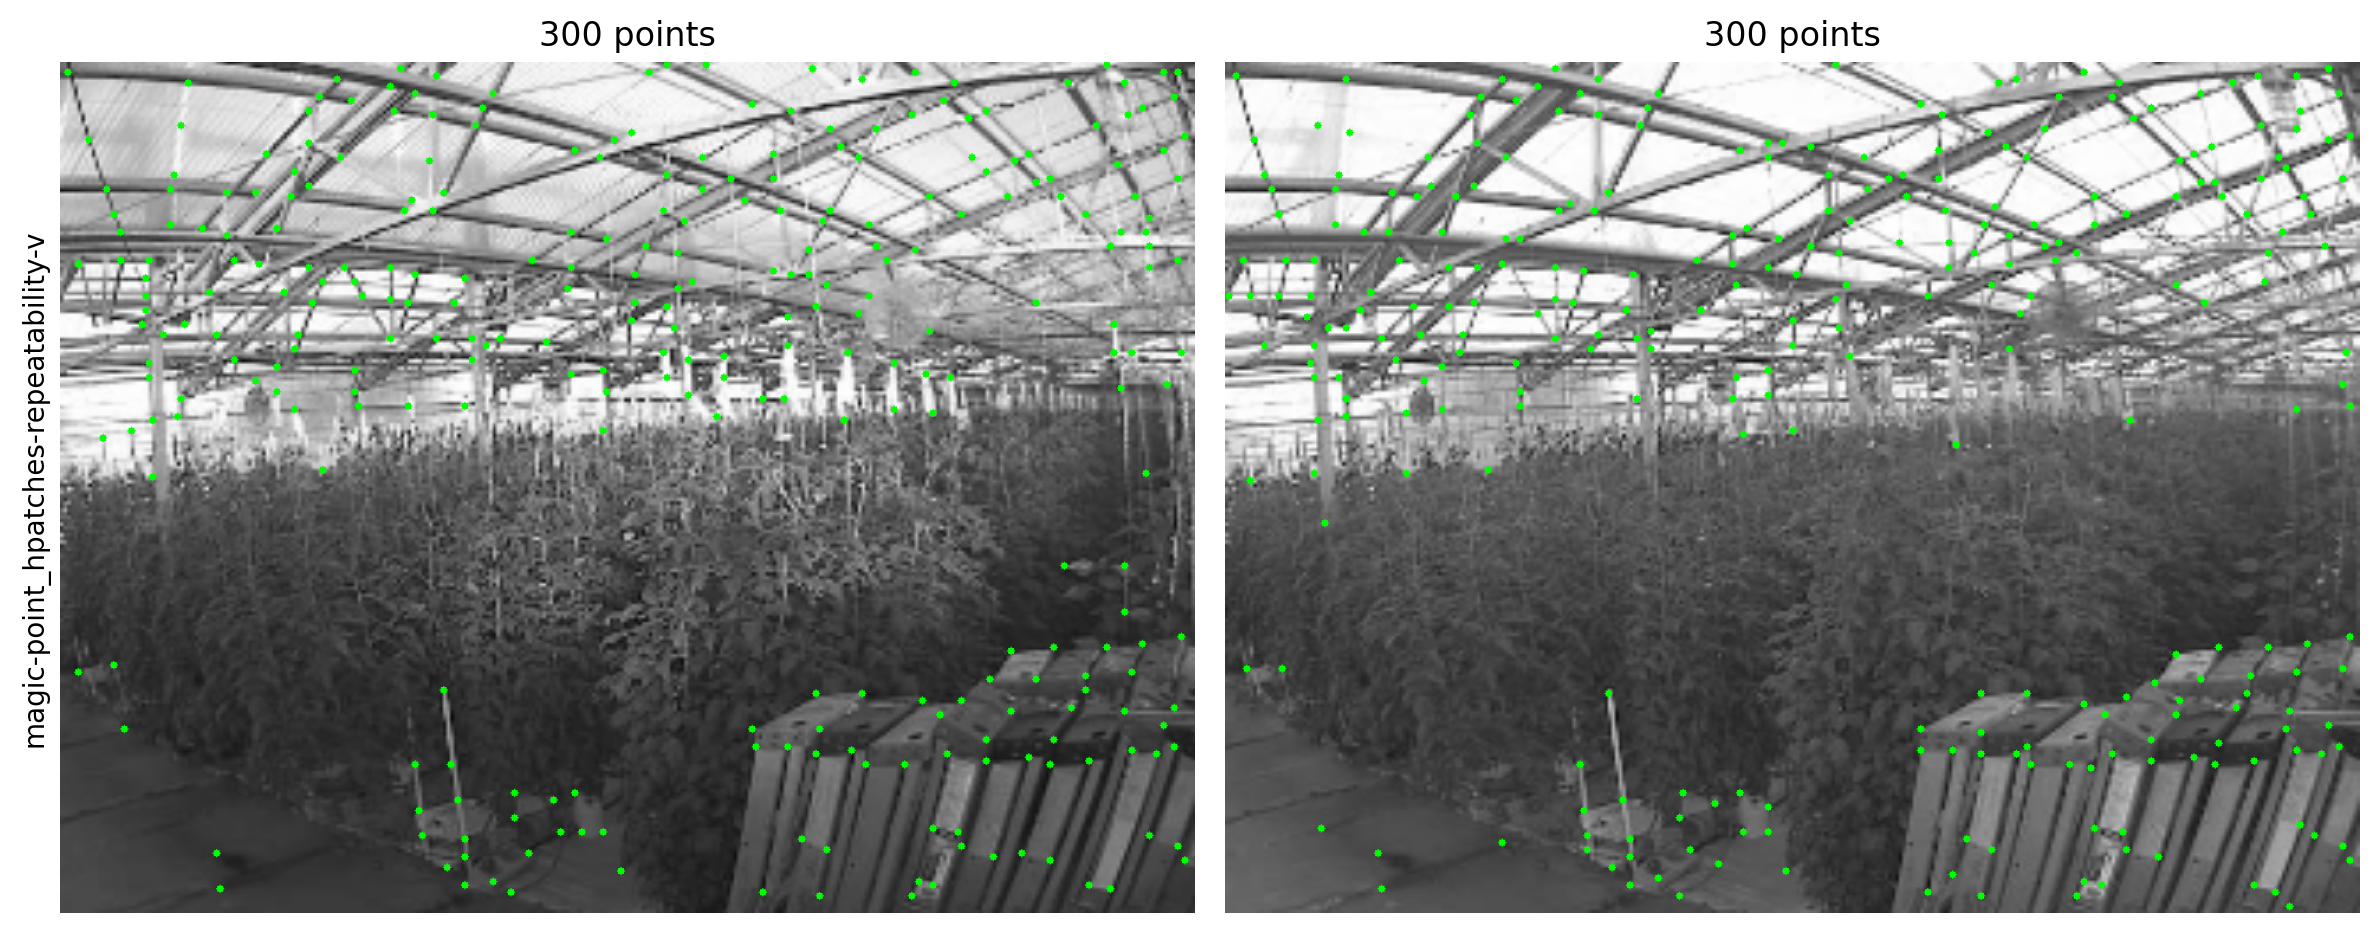

In [4]:
for i in range(1):
    for e, thresh in zip(experiments, confidence_thresholds):
        path = Path(EXPER_PATH, "outputs", e, str(i) + ".npz")
        d = np.load(path)
        
        points1 = select_top_k(d['prob'], thresh=thresh)
        im1 = draw_keypoints(d['image'][..., 0] * 255, points1, (0, 255, 0)) / 255.
        
        points2 = select_top_k(d['warped_prob'], thresh=thresh)
        im2 = draw_keypoints(d['warped_image'] * 255, points2, (0, 255, 0)) / 255.

        plot_imgs([im1, im2], ylabel=e, dpi=200, cmap='gray',
                  titles=[str(len(points1[0]))+' points', str(len(points2[0]))+' points'])

### Repeatability

In [7]:
for exp in experiments:
    repeatability = ev.compute_repeatability(exp, keep_k_points=300, distance_thresh=5, verbose=False)
    print('> {}: {}'.format(exp, repeatability))

> mp_synth-v11_repeat_hp_v: 0.7624955076166583
> magic-point_hpatches-repeatability-v: 0.7691442623229343


# HPatches Illumination

In [6]:
experiments = [
    'mp_synth-v11_repeat_hp_i',
    'mp_synth-v11_ha1_repeat_hp_i',
    'mp_synth-v11_ha1_trained_repeat_hp_i',
    'sp_v6_repeat_hp_i',
    'magic_leap_pretrained_model_repeat_hp_i',
    'harris_repeat_hp_i',
    'fast_repeat_hp_i',
    'shi_repeat_hp_i'
]
confidence_thresholds = [0.001, 0.001, 0.001, 0.001, 0.001, 0, 0, 0]

### Images visualization

In [7]:
for i in range(1):
    for e, thresh in zip(experiments, confidence_thresholds):
        path = Path(EXPER_PATH, "outputs", e, str(i) + ".npz")
        d = np.load(path)
        
        points1 = select_top_k(d['prob'], thresh=thresh)
        im1 = draw_keypoints(d['image'][..., 0] * 255, points1, (0, 255, 0)) / 255.
        
        points2 = select_top_k(d['warped_prob'], thresh=thresh)
        im2 = draw_keypoints(d['warped_image'] * 255, points2, (0, 255, 0)) / 255.

        plot_imgs([im1, im2], ylabel=e, dpi=200, cmap='gray',
                  titles=[str(len(points1[0]))+' points', str(len(points2[0]))+' points'])

FileNotFoundError: [Errno 2] No such file or directory: '/home/xiaoran/桌面/SuperPoint-master/EXPERIMENT/outputs/mp_synth-v11_repeat_hp_i/0.npz'

### Repeatability

In [8]:
for exp in experiments:
    repeatability = ev.compute_repeatability(exp, keep_k_points=300, distance_thresh=3, verbose=False)
    print('> {}: {}'.format(exp, repeatability))

> mp_synth-v11_repeat_hp_i: 0.6167426900584795
> mp_synth-v11_ha1_repeat_hp_i: 0.6735380116959063
> mp_synth-v11_ha1_trained_repeat_hp_i: 0.6610175438596491
> sp_v6_repeat_hp_i: 0.6623471943909717
> magic_leap_pretrained_model_repeat_hp_i: 0.6407719298245614
> harris_repeat_hp_i: 0.6303040935672515
> fast_repeat_hp_i: 0.5759948775420992
> shi_repeat_hp_i: 0.583578947368421
